## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
dataset = pd.read_csv("ETH-USD.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-06,308.644989,329.451996,294.541992,307.907990,307.907990,4235016896
1,2017-11-13,307.024994,371.290985,307.024994,354.385986,354.385986,6084391936
2,2017-11-20,354.093994,485.191986,350.692993,471.329987,471.329987,9316127936
3,2017-11-27,471.531006,522.307007,401.243011,465.852997,465.852997,10504046976
4,2017-12-04,466.053986,504.147003,414.411011,441.721008,441.721008,12094509888
...,...,...,...,...,...,...,...
317,2023-12-04,2193.663330,2401.760498,2191.176270,2352.462646,2352.462646,89616323733
318,2023-12-11,2352.496582,2354.914063,2150.754395,2196.481201,2196.481201,79101655424
319,2023-12-18,2195.341797,2341.947510,2120.127441,2265.692139,2265.692139,79838355953
320,2023-12-25,2265.340576,2445.017578,2180.225342,2300.690674,2300.690674,61063995103


## Preprocessing data

In [3]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[['Open', 'High', 'Low', 'Close', 'Adj Close']])

In [5]:
# Ubah data yang sudah dinormalisasi ke dalam DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])

In [6]:
# Tampilkan informasi dataset setelah preprocessing
print("\nInfo Dataset Setelah Preprocessing:")
print(scaled_df.info())


Info Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       322 non-null    float64
 1   High       322 non-null    float64
 2   Low        322 non-null    float64
 3   Close      322 non-null    float64
 4   Adj Close  322 non-null    float64
dtypes: float64(5)
memory usage: 12.7 KB
None


## Pemilihan Atribut

In [7]:
dataset = dataset[["High", "Low"]] #x1=High, x2=Low
dataset.head(10)

,High,Low
0,329.451996,294.541992
1,371.290985,307.024994
2,485.191986,350.692993
3,522.307007,401.243011
4,504.147003,414.411011
5,753.120972,439.104004
6,881.943970,543.762024
7,789.252991,685.231018
8,1153.170044,742.004028
9,1432.880005,1016.049988


In [8]:
dataset.describe()

,High,Low
count,322.000000,322.000000
mean,1340.975193,1129.573523
std,1204.979908,1021.001770
min,96.257301,82.829887
25%,248.853096,214.998257
50%,1190.084411,806.149506
75%,1953.031952,1747.854767
max,4891.704590,4485.093262


## Statistik Data

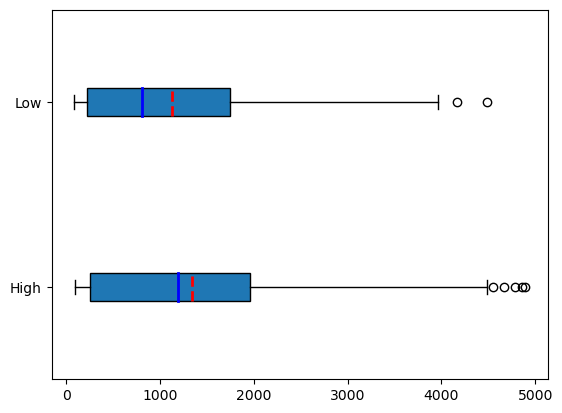

In [9]:
fig, ax = plt.subplots()
ax.boxplot(dataset,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("High", "Low"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

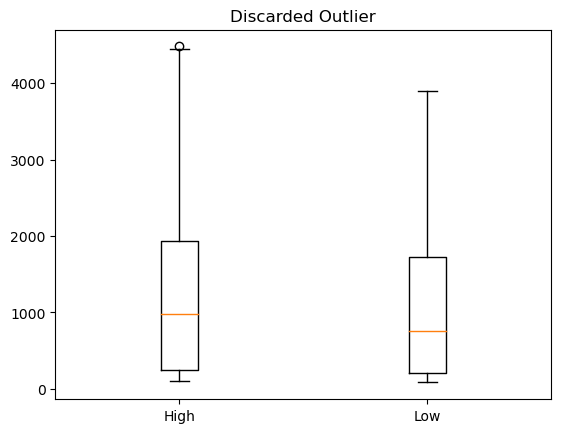

In [10]:
#Q1,Q3, IQR
kolom = ["High", "Low"]

Q1 = dataset[kolom].quantile(0.25)
Q3 = dataset[kolom].quantile(0.75)
IQR = Q3-Q1
data = dataset[~((dataset[kolom]<(Q1 - 1.5 * IQR)) | 
                (dataset[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]
plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Discarded Outlier")
plt.show

In [11]:
dataset.describe()

,High,Low
count,322.000000,322.000000
mean,1340.975193,1129.573523
std,1204.979908,1021.001770
min,96.257301,82.829887
25%,248.853096,214.998257
50%,1190.084411,806.149506
75%,1953.031952,1747.854767
max,4891.704590,4485.093262


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    322 non-null    float64
 1   Low     322 non-null    float64
dtypes: float64(2)
memory usage: 5.2 KB


## Membuat nilai X dan melakukan pembentukan model

In [13]:
x_array = np.array(dataset)

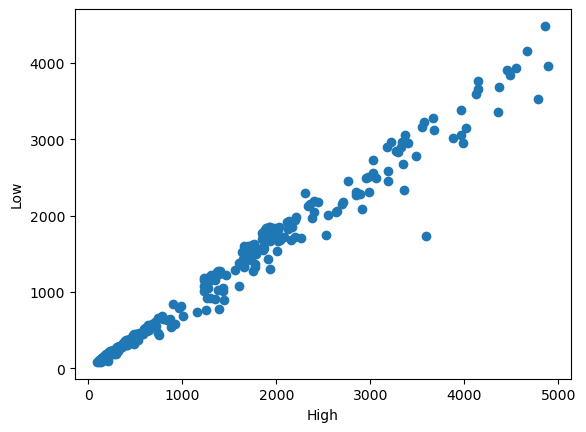

In [24]:
plt.scatter(dataset['High'], dataset['Low'])
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

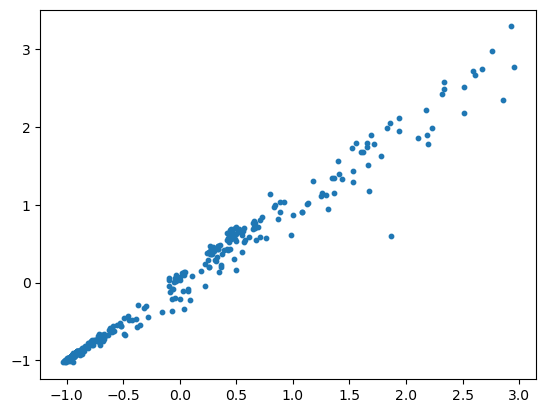

In [15]:
from sklearn.preprocessing import StandardScaler as stdsc
scaler = stdsc()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1],s=10)
plt.show()

In [16]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init=10) # (n_init= bisa 'auto' atau 10)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_)

C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 644.0


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2 185.0624309380926


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 60.6903791585402


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4 38.239815635990674


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 25.403579504419305


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


6 18.69760609923949


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 13.638289073104172


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


8 10.88213898503933


C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


9 9.14193095058508


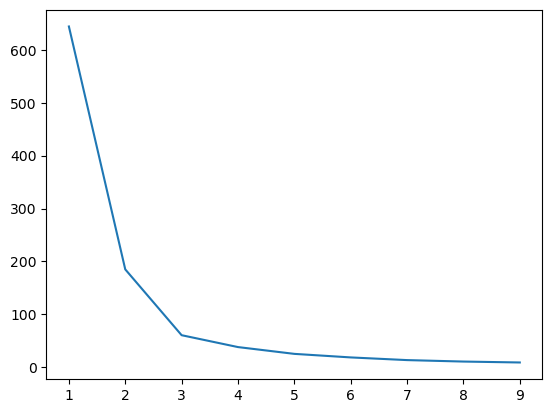

In [17]:
plt.plot(index,sse)
plt.show()

## Check sum Square Error

In [18]:
kmeans = KMeans(n_clusters = 2, random_state=0, n_init=10) # (n_init= bisa 'auto' atau 10)
kmeans.fit(x_scaled)

C:\Users\abima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[ 0.99277635,  1.00699076],
       [-0.70761718, -0.71774874]])

## Evaluasi model dan visualisasi data setelah cluster

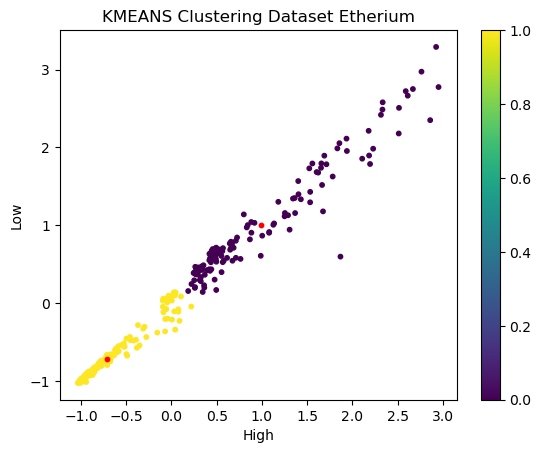

In [20]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1],s=10, c=kmeans.labels_) #Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c="red", s=10)#Centroid
plt.title("KMEANS Clustering Dataset Etherium")
plt.xlabel("High")
plt.ylabel("Low")
plt.colorbar(output)
plt.show()

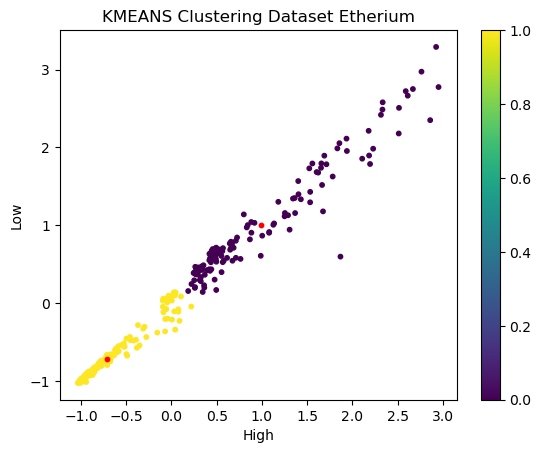

In [21]:
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=10, c=kmeans.labels_)  # Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=10)  # Centroid
plt.title("KMEANS Clustering Dataset Etherium")
plt.xlabel("High")
plt.ylabel("Low")
plt.colorbar(output)
plt.show()

## Evaluasi model

In [22]:
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.5131447600518976